# Introdução a análise de dados com Pandas - Parte 2
Na segunda parte do curso faremos a utilização de histogramas.

Histogramas são utilizados para analisar a distribuição de frequência de dados. 

Para tanto, trabalharemos com uma nova base nomeada "housing_ok.csv"

Faremos inicialmente o processo de pré análise dos dados, iniciando pela importação dos mesmos.

In [1]:
import pandas as pd
housing = pd.read_csv('housing_ok.csv')

Utilizando o comando "head()", podemos visualisar as 5 primeiras linas da tabela.

In [2]:
housing.head()

,bairro,endereco,quartos,tipo,preco,distancia_aeroporto,cep,banheiros,vagas,area_terreno,area_construida,ano_construcao,latitude,longitude
0,Collingwood,2/79 Oxford St,2.0,kitnet,855000.0,1.6,3066.0,1.0,1.0,2886.0,122.0,1830.0,-37.8042,144.9845
1,Richmond,22a Stanley St,3.0,casa,1600000.0,2.6,3121.0,2.0,2.0,80.0,144.0,1850.0,-37.8233,144.9947
2,Fitzroy,52 Nicholson St,4.0,casa,3310000.0,1.6,3065.0,4.0,2.0,337.0,291.0,1854.0,-37.8052,144.9739
3,South Melbourne,352 Moray St,4.0,casa,2260000.0,2.1,3205.0,3.0,0.0,190.0,232.0,1856.0,-37.8377,144.9653
4,Port Melbourne,175 Stokes St,3.0,casa,2200000.0,3.8,3207.0,2.0,0.0,250.0,280.0,1863.0,-37.8381,144.9391


A tabela trata de dados imobiliários da cidade de Melbourne, Austrália.


Obtendo informações gerais da tabela.

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
bairro                 3021 non-null object
endereco               3021 non-null object
quartos                3021 non-null float64
tipo                   3021 non-null object
preco                  3021 non-null float64
distancia_aeroporto    3021 non-null float64
cep                    3021 non-null float64
banheiros              3021 non-null float64
vagas                  3021 non-null float64
area_terreno           3021 non-null float64
area_construida        3021 non-null float64
ano_construcao         3021 non-null float64
latitude               3021 non-null float64
longitude              3021 non-null float64
dtypes: float64(11), object(3)
memory usage: 330.5+ KB


Observe que tanto a coluna 'quartos' quanto a coluna 'vagas' foram interpretadas como tipo 'float64'.

Primeiramente faremos a conversão desses dois atributos para o formato inteiro.

In [4]:
housing.quartos = housing.quartos.astype(int)
housing.vagas = housing.vagas.astype(int)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
bairro                 3021 non-null object
endereco               3021 non-null object
quartos                3021 non-null int64
tipo                   3021 non-null object
preco                  3021 non-null float64
distancia_aeroporto    3021 non-null float64
cep                    3021 non-null float64
banheiros              3021 non-null float64
vagas                  3021 non-null int64
area_terreno           3021 non-null float64
area_construida        3021 non-null float64
ano_construcao         3021 non-null float64
latitude               3021 non-null float64
longitude              3021 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 330.5+ KB


Para gerar histogramas é necessário importar o pacote de gráficos "matplotli.pyplot"

In [6]:
import matplotlib.pyplot as plt

Faremos inicialmente a plotagem do histograma do preço dos imóveis.

Text(0, 0.5, 'Frequência')

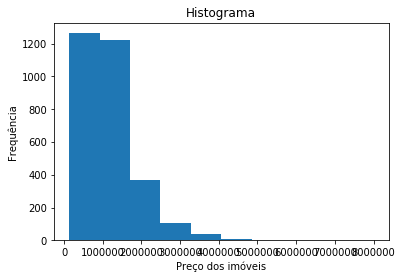

In [7]:
plt.hist(housing.preco)
plt.title('Histograma')
plt.xlabel('Preço dos imóveis')
plt.ylabel('Frequência')

Observe que os valores dos preços mostrados no eixo $x$ são de difícil visualização.

Uma forma de resolver isso é dividindo todos os preços por 1000.

In [8]:
housing.preco = housing.preco / 1000

Text(0, 0.5, 'Frequência')

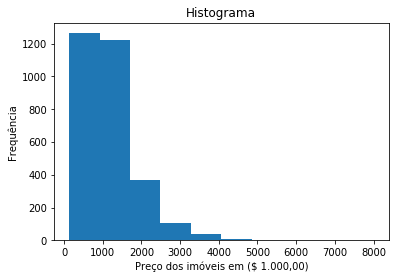

In [9]:
plt.hist(housing.preco)
plt.title('Histograma')
plt.xlabel('Preço dos imóveis em ($ 1.000,00)')
plt.ylabel('Frequência')

Faremos agora a plotagem do histograma do número de quartos.

Text(0, 0.5, 'Frequência')

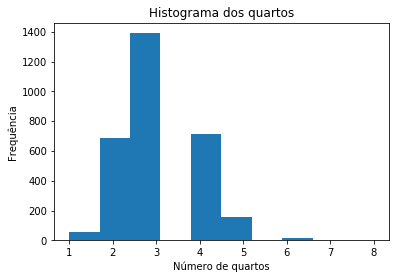

In [10]:
plt.hist(housing.quartos)
plt.title('Histograma dos quartos')
plt.xlabel('Número de quartos')
plt.ylabel('Frequência')

Por conta dos intervalos gerados automaticamente pelo gráfico, a interpretação do do mesmo ficou comprometida. 

Para facilitar a análise faremos a configuração dos intervalos do histograma através do parâmetro "bins".

O parâmetro "bins" determina a quatidade de barras que farão parte do gráfico. Nós sabemos que o menor número de quartos que aparece nos dados é igual a 1, e o número máximo de quartos é igual a 8.

Text(0, 0.5, 'Frequência')

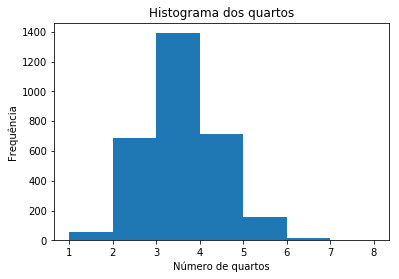

In [11]:
plt.hist(housing.quartos, bins=range(1, 9))
plt.title('Histograma dos quartos')
plt.xlabel('Número de quartos')
plt.ylabel('Frequência')

Com a nova visualização é possível observar que a maiora dos imóveis dessa base possui um total de 3 quartos.